##### This project involves developing a Python-based spam email detection system. The goal is to train a machine learning model to categorize emails as spam or legitimate (ham), effectively filtering out unwanted and potentially harmful emails from our inbox.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\reshm\OneDrive\Desktop\DataScience Works\spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [19]:
df.shape


(5572, 2)

In [20]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
#missing values
df.isna().sum()

v1    0
v2    0
dtype: int64

In [22]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [23]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


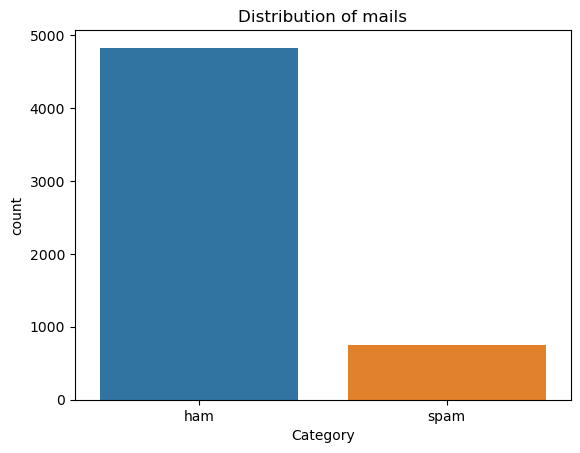

In [24]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [27]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [28]:
# Separate the feature (message) and target (category) data

X = df["Message"]
Y = df["Category"]

In [29]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [31]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

Splitting the data into training data and test data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = )

In [34]:
# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [36]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [37]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [38]:
print(X_train)

4459    This is wishing you a great day. Moji told me ...
1921            No current and food here. I am alone also
5255                                Ok... Sweet dreams...
5507               I want to be inside you every night...
356     Congratulations ur awarded 500 of CD vouchers ...
                              ...                        
4307    Ha ha - had popped down to the loo when you he...
2550    Please sen :)my kind advice :-)please come her...
537     Or maybe my fat fingers just press all these b...
1220    No. 1 Nokia Tone 4 ur mob every week! Just txt...
4271                                  Where to get those?
Name: Message, Length: 4457, dtype: object


In [39]:
print(X_train_features)

  (0, 6123)	0.150056643873625
  (0, 6762)	0.21845260614251935
  (0, 2898)	0.21845260614251935
  (0, 2605)	0.24835311096826024
  (0, 6332)	0.28420315385994216
  (0, 1267)	0.28420315385994216
  (0, 3946)	0.28420315385994216
  (0, 2444)	0.2709719696954353
  (0, 6163)	0.26158429513276704
  (0, 4730)	0.39388005351805083
  (0, 6717)	0.18408609668426132
  (0, 4418)	0.25430264903420124
  (0, 2123)	0.14000703758213576
  (0, 3129)	0.3252517926186216
  (0, 7269)	0.23896543640559206
  (1, 2829)	0.6479775605087087
  (1, 2062)	0.7616594259097583
  (2, 2379)	0.6825211227150207
  (2, 6442)	0.6052720659846864
  (2, 4748)	0.40964697385243404
  (3, 4615)	0.49124784286547085
  (3, 3567)	0.7505146065262959
  (3, 7125)	0.44204454783505825
  (4, 1853)	0.2723459881408488
  (4, 3920)	0.2559205661307812
  :	:
  (4454, 2322)	0.3598904793482505
  (4454, 2763)	0.3936844104279752
  (4454, 4269)	0.33462313691528767
  (4454, 2696)	0.3936844104279752
  (4454, 3748)	0.20274164037982878
  (4454, 3830)	0.2233955285936616

In [40]:
# Create and Fit Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [41]:
#Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [42]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9703836661431456


In [43]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [44]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9632286995515695


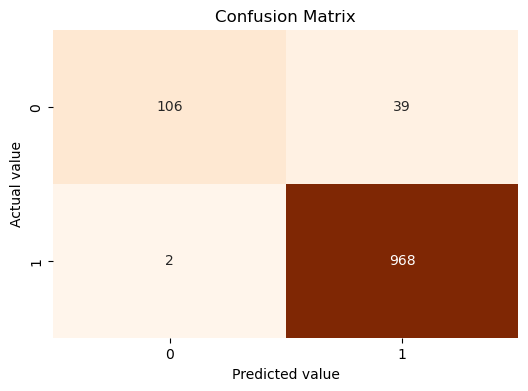

In [45]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()